In [109]:
# Protein Functional Class Prediction Project

# Install libraries 
!pip install pandas numpy matplotlib biopython scikit-learn torch torchvision tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Libraries used for future work
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset


In [110]:
# Load dataset
data = pd.read_csv("C:/Users/Janu/Desktop/Protein Function Prediction/balanced_seq.csv")

# Check structure
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Extract features & labels
sequences = data['Sequence']
labels = data['ProteinClass']

    Entry                                           Sequence Selected_PDB  \
0  P07151  MARSVTVIFLVLVSLAVVLAIQKTPQIQVYSRHPPENGKPNFLNCY...         1kjv   
1  P78325  MRGLGLWLLGAMMLPAIAPSRPWALMEQYEVVLPWRLPGPRVRRAL...         4dd8   
2  Q16819  MAWIRSTCILFFTLLFAHIAAVPIKYLPEENVHDADFGEQKDISEI...         7uaf   
3  Q92932  MGPPLPLLLLLLLLLPPRVLPAAPSSVPRGRQLPGRLGCLLEEGLC...         2qep   
4  Q3UV74  MLGQCTLLPVLAGLLSLESALSQLCTKDNVSTCQDCIRSGPSCAWC...         2iue   

  ProteinClass  
0          MHC  
1     Protease  
2     Protease  
3  Phosphatase  
4     Integrin  
Entry           0
Sequence        0
Selected_PDB    0
ProteinClass    0
dtype: int64


In [111]:
# Create features from sequences
def compute_amino_acid_composition(sequence):
    amino_acids = "ACDEFGHIKLMNPQRSTVWY"
    composition = [sequence.count(aa) / len(sequence) for aa in amino_acids]
    return composition

# Apply feature extraction to all sequences
features = sequences.apply(compute_amino_acid_composition)

# Convert to a DataFrame
X = pd.DataFrame(features.tolist())
X.columns = list("ACDEFGHIKLMNPQRSTVWY")

# Check structure
print(X.head())

          A         C         D         E         F         G         H  \
0  0.042017  0.016807  0.042017  0.058824  0.050420  0.016807  0.033613   
1  0.091019  0.053398  0.036408  0.054612  0.027913  0.095874  0.041262   
2  0.048257  0.025469  0.069705  0.052279  0.053619  0.073727  0.029491   
3  0.089655  0.013793  0.058128  0.072906  0.021675  0.070936  0.026601   
4  0.040650  0.073171  0.048780  0.050136  0.033875  0.081301  0.018970   

          I         K         L         M         N         P         Q  \
0  0.067227  0.075630  0.084034  0.025210  0.042017  0.075630  0.042017   
1  0.016990  0.029126  0.082524  0.016990  0.030340  0.087379  0.048544   
2  0.067024  0.040214  0.080429  0.017426  0.045576  0.041555  0.060322   
3  0.022660  0.036453  0.118227  0.019704  0.023645  0.077833  0.051232   
4  0.042005  0.044715  0.093496  0.016260  0.048780  0.039295  0.069106   

          R         S         T         V         W         Y  
0  0.033613  0.067227  0.075630  0

In [112]:
# Label encoding
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

# Check class mappings
print(dict(zip(encoder.classes_, range(len(encoder.classes_)))))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


{'ATPase': 0, 'Aquaporin': 1, 'Channel': 2, 'GPCR': 3, 'Integrin': 4, 'MHC': 5, 'Phosphatase': 6, 'Protease': 7, 'RTK': 8, 'Ser:Thr': 9}


In [113]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
rf_model_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_model_predictions))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.95      1.00      0.98        20
           2       0.64      0.70      0.67        20
           3       0.97      0.94      0.95        32
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        14
           6       0.89      0.89      0.89        18
           7       0.86      0.82      0.84        22
           8       1.00      0.87      0.93        15
           9       0.78      0.93      0.85        15

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



In [114]:
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=100, random_state=0)
lr_model.fit(X_train, y_train)

# Predictions and evaluation
lr_model_predictions = lr_model.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_model_predictions))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.40      1.00      0.57        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        32
           4       0.64      0.47      0.55        19
           5       0.17      1.00      0.29        14
           6       0.25      0.06      0.09        18
           7       0.00      0.00      0.00        22
           8       0.22      0.13      0.17        15
           9       0.24      0.67      0.35        15

    accuracy                           0.28       200
   macro avg       0.19      0.33      0.20       200
weighted avg       0.17      0.28      0.18       200



C:\Users\Janu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Janu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Janu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [115]:
# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions and evaluation
knn_model_predictions = knn_model.predict(X_test)
print("K-Nearest Neighbours Classification Report:\n", classification_report(y_test, knn_model_predictions))

K-Nearest Neighbours Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        25
           1       0.91      1.00      0.95        20
           2       0.54      0.65      0.59        20
           3       0.95      0.66      0.78        32
           4       0.79      1.00      0.88        19
           5       1.00      0.93      0.96        14
           6       0.64      0.78      0.70        18
           7       1.00      0.45      0.62        22
           8       0.50      0.60      0.55        15
           9       0.69      0.73      0.71        15

    accuracy                           0.77       200
   macro avg       0.78      0.78      0.76       200
weighted avg       0.80      0.77      0.77       200



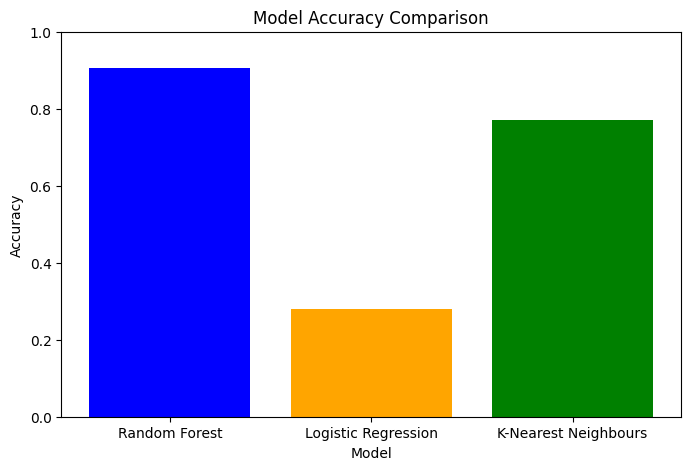

In [116]:
# Calculate accuracy for all models
acc_rf = accuracy_score(y_test, rf_model_predictions)
acc_lr = accuracy_score(y_test, lr_model_predictions)
acc_knn = accuracy_score(y_test, knn_model_predictions)

# Plot accuracy comparison graph
import matplotlib.pyplot as plt

model_names = ['Random Forest', 'Logistic Regression', 'K-Nearest Neighbours']
accuracies = [acc_rf, acc_lr, acc_knn]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()
